## Kontenery

Dostęp do zasobów obliczeniowych to nie wszystko. Komputer na którym pracujemy musi mieć jeszcze zainstalowane odpowiednie oprogramowanie.
Zwykle nie mamy praw administratora by zainstalować oprogramowanie którego potrzebujemy. Ten problem jest rozwiązany przez utworzenie wydzielonego środowiska w którym każdy użytkownik może zainstalować aplikacje których potrzebuje.

Obecnie najbardziej ogólnym narzędziem dostarczającym takiego wydzielonego środowiska są **kontenery**.

Kontener zachowuje się jak wirtualna maszyna. Konfigurując kontener możemy zainstalować na nim oprogramowanie którego potrzebujemy.
Na maszynie obliczeniowej uruchamiamy kontener i mamy do dyspozycji wszystkie aplikacje które zainstalowaliśmy. Pliki z których uruchamiamy kontener to 
`obrazy` (ang. images). Z jednego obrazu można uruchomić wiele kontenerów, które będą miały tę samą konfigurację.

Istnieje kilka aplikacji, które pozwalają na uruchomienie kontenerów. Dwie najbardziej popularne to:

* [Docker](https://www.docker.com/) - dominujący na rynku. Łatwa obsługa z użyciem interfejsu graficznego, dostępny na każdej platformie. 
<span style="color:red">Wymaga uprawnień administratora.</span>

* [apptainer (dawniej singularity)](https://apptainer.org/) - powszechnie używany w ośrodkach obliczeniowych, nie wymaga uprawnień administratora,
<span style="color:blue">może używać plików  Dockera</span>. apptainer jest powszechnie dostępny na klastrach obliczeniowych.

Kontenery, `czyli gotowe zestawy oprogramowania włącznie z systemem operacyjnym`,  można łatwo przekazywać przez biblioteki:
* [Dockerhub](https://hub.docker.com/) - zawiera ogromną liczbę obrazów, np. obrazy z narzędziami ML w tym modelami językowymi:

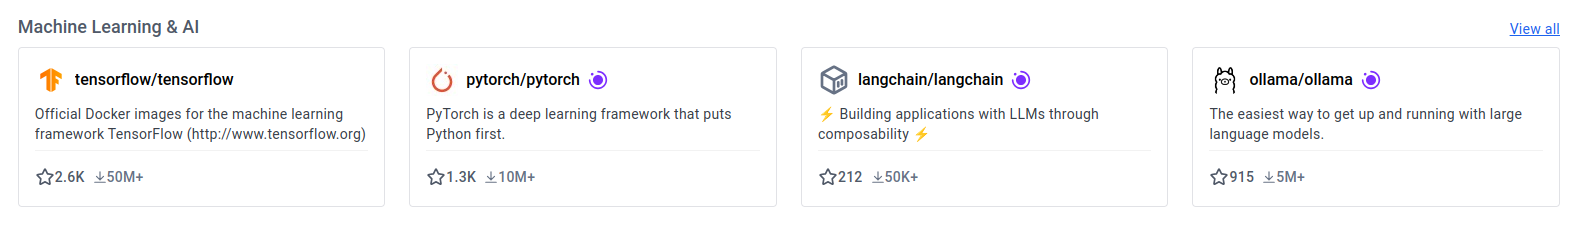

* [sylabs](https://cloud.sylabs.io/)

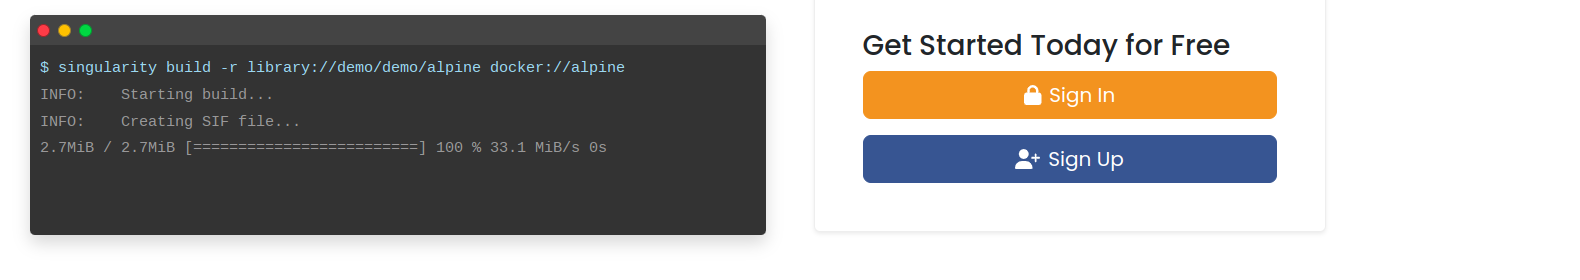



**Proszę**:

* uruchomić kontener zawierający serwer modeli [LLama](https://www.llama.com/)

**Uwaga:** okno zostanie zajęte przez komunikaty serwera - do dalszej pracy trzeba otworzyć nową zakładkę terminala.
```Bash
apptainer run --bind ollama:/root/.ollama ~akalinow/Publiczny/NWP/ollama.sif
```

Oczekiwany rezultat:

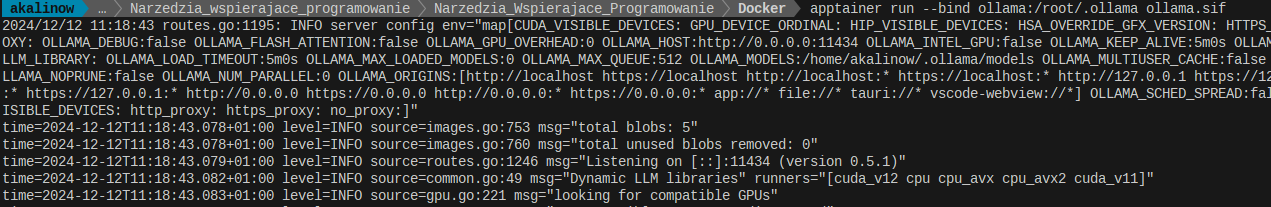

Serwer działa na porcie `11434` na lokalnym komputerze. Proszę się podłączyć do tego portu i sprawdzić, że serwer rzeczywiście 
działa:

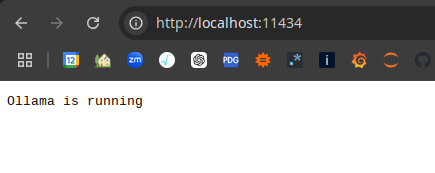


* uruchomić powłokę systemową `bash` w drugiej instancji kontenera:

```Bash
singularity exec --bind ollama:/root/.ollama ~akalinow/Publiczny/NWP/ollama.sif /bin/bash
```

* w kontenerze uruchomić model `tinyllama`:
```Bash
ollama run tinyllama
```
Oczekiwany rezultat:

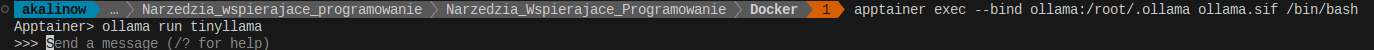


* proszę porozmawiać chwilę ze swoim komputerem. Komputer nie będzie zbyt mądry ponieważ użyliśmy modelu `tinyllama`.
W wolnej chwil można spróbować innego modelu z [biblioteki](https://ollama.com/library)


* zamiast komendy uruchamiającej powłokę systemową można od razu uruchomić model językowy:
```Bash
singularity exec --bind ollama:/root/.ollama ~akalinow/Publiczny/NWP/ollama.sif ollama run tinyllama
```

Spróbujmy przeprowadzić rozmowę z komputerem używając kodu w języku Python.

**Proszę:**

* podłączyć się do kontenera `ollama`
* uruchomić interpreter języka Python
* wykonać następujący kod:
```Python
from ollama import chat
```

i ...

## Budowa kontenera

Kontenery można łatwo budować od "zera", lub dodając własne pakiety do istniejących kontenerów. W systemie Docker do definiowania kontenera służy 
plik [Dockerfile](https://docs.docker.com/build/concepts/dockerfile/).

Dodamy do kontenera `ollama` pakiety których nam brakuje:

* python3
* jupyter

W naszym przypadku plik `Dockerfile` ma następującą postać:
```Bash
# Use the official centos image as parent image
FROM ollama/ollama

# Define who is responsible for this Dockerfile
LABEL maintainer="Artur.Kalinowski@fuw.edu.pl"

USER root
RUN apt update
RUN apt -y install \
	python3 python3-pip 

# Install python packages
RUN pip3 install ollama
RUN pip3 install --upgrade jupyter jupyterlab

# Install Jupyter start script
RUN mkdir /opt/jupyter
COPY start-jupyter.sh /opt/jupyter/
```

Kontener mozna zbudować z linii poleceń:
```
sudo docker image build -t candidate  ./ -f Dockerfile <-- utworzenie kontenera. Po utworzeniu trzeba przetestować kontener 
sudo docker image tag candidate $USER/nwp_lecture      <-- nadanie docelowej etykiety
sudo docker image push akalinow/nwp_lecture            <-- wysłanie kontenera do biblioteki (wymaga założenia konta na Dockerhub)
```


Jak widać polecenia budowy kontenera wymagają uprawnień administratora - komenda `sudo`.
Zbudujemy testowy kontener używając serwisu [Play-with-docker](https://www.docker.com/play-with-docker/)

**Proszę:**

* uruchomić instancję maszyny do budowania kontenerów w usłudze `Play-with-docker`
* utworzyć na tej maszynie dwa puste pliki:
```Bash
$ echo > Dockerfile
$ echo > start-jupyter.sh
```

* używając edytora zapełnić pliki właściwą treścią
* zbudować kontener

Oczekiwany rezultat:

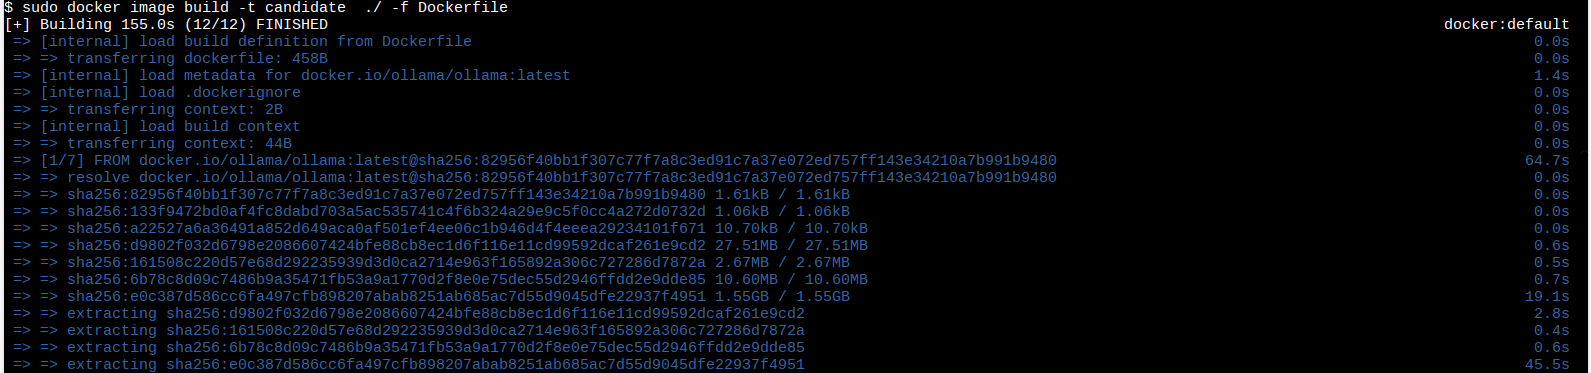


Utworzony kontener możemy zapisać do pliku:

```Bash
docker save candidate > candidate.tar
```
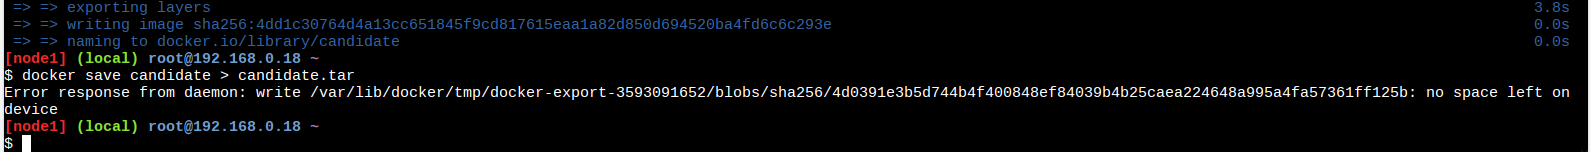

...ale niestety brakuje nam miejsca na dysku.

Mamy jednak gotowy kontener przepisany do formatu `singularity`:
```Bash
ollama_with_jupyter.sif
```

**Proszę:**

* uruchomić serwer `ollama`
* uruchomić serwer Jupyter z kontenera `ollama_with_jupyter.sif`
* podłączyć się do serwera Jupyter
* stworzyć notatnik i wykonać w nim kod:
```Python
from ollama import chat

messages = [
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
]

response = chat('tinyllama', messages=messages)
print(response['message']['content'])
```

# Zadania domowe 

Rozwiązania zadań domowych w postaci przekonujących zrzutów ekranu proszę załadować na stronę przedmiotu w serwisie `Kampus`.

a)

**Proszę:**

* osoby z laptopami z Windows: o instalację aplikacji [Docker Desktop](https://docs.docker.com/desktop/install/windows-install/)
* osoby z laptopami z Linuksem: o instalację pakietu [Docker Engine](https://docs.docker.com/engine/install/ubuntu)
* po instalacji proszę uruchomić testowy kontener `hello_world`
  (Windows - proszę otworzyć okno powłoki: `power shell` i pominąć komendę `sudo`):
  ```Shell
  sudo docker run hello-world
  ```

Oczekiwany wynik:

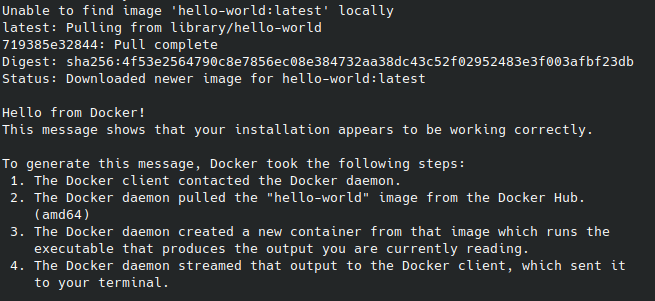

b)

**Proszę:**

* znaleźć w `Dockerhub` kontener z serwerem Jupyter
* otworzyć adres URL serwera Jupyter ze swojej lokalnej maszyny
* pobrać notatnik [00a_Konfiguracja_srodowiska.ipynb](https://github.com/akalinow/Narzedzia_Wspierajace_Programowanie/blob/main/00_Konfiguracja_srodowiska/00a_Konfiguracja_srodowiska.ipynb) na lokalny komputer
* uruchomić wszystkie komórki w notatniku na lokalnym komputerze